In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:12<00:00, 183MB/s]
100% 1.06G/1.06G [00:12<00:00, 92.2MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [9]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
#Normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [18]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D (pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense (1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 106ms/step - loss: 1.6343 - accuracy: 0.5809 - val_loss: 0.6146 - val_accuracy: 0.6588
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5894 - accuracy: 0.6985 - val_loss: 0.5481 - val_accuracy: 0.7178
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5062 - accuracy: 0.7527 - val_loss: 0.5090 - val_accuracy: 0.7392
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4352 - accuracy: 0.7993 - val_loss: 0.4441 - val_accuracy: 0.7960
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3775 - accuracy: 0.8313 - val_loss: 0.4596 - val_accuracy: 0.7808
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3067 - accuracy: 0.8686 - val_loss: 0.4803 - val_accuracy: 0.8064
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2399 - accuracy: 0.9020 - val_loss: 0.4819 - val_ac

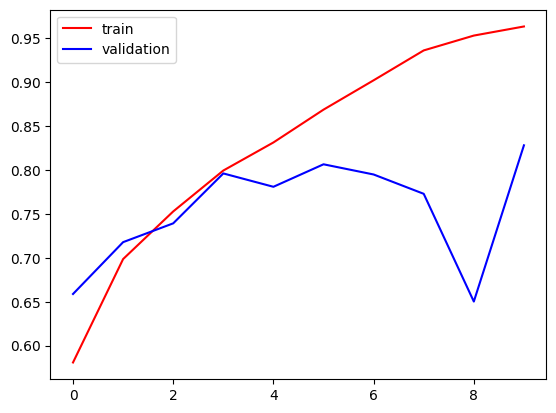

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

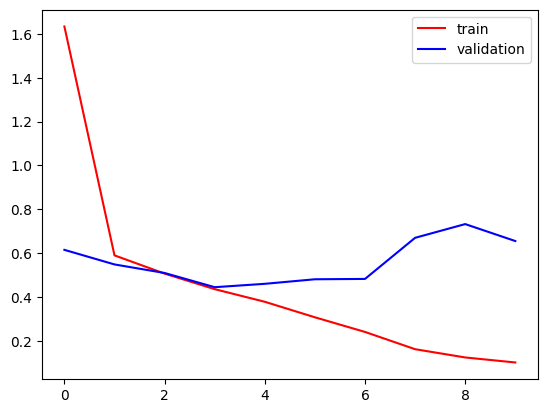

In [23]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [24]:
import cv2

In [31]:
test_img = cv2.imread('/content/cat.jpg')

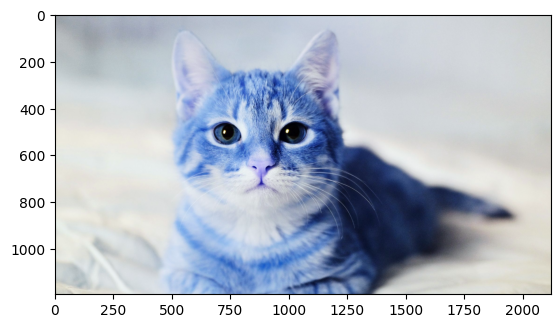

In [32]:
plt.imshow(test_img)

In [33]:
test_img.shape

(1194, 2121, 3)

In [34]:
test_img = cv2.resize(test_img,(256,256))

In [37]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)